# TASK B - Category of Sexism

In [134]:
# # Install necessary libraries and make sure you have the correct python version installed in your computer
# !pip install pandas numpy
# !pip3 install wordcloud
# !pip3 install imbalanced-learn
# !pip3 install tensorflow
# !pip3 install keras

In [135]:
# Load, explore and plot data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

# Reading csv file and transforming the dataframe

In [136]:
df = pd.read_csv('train_all_tasks.csv', usecols=['text', 'label_sexist', 'label_category'])
df = df[df['label_sexist'] == 'sexist']
# giving numerical values to categories 
df['label_category'] = df['label_category'].map({'1. threats, plans to harm and incitement': 0, '2. derogation': 1, '3. animosity': 2, 
                                                 '4. prejudiced discussions': 3})
df.describe()
df.groupby('label_category').describe().T

label_category                                                       0  \
text         count                                                 310   
             unique                                                310   
             top     fuck her off with a nine mm this is what you g...   
             freq                                                    1   
label_sexist count                                                 310   
             unique                                                  1   
             top                                                sexist   
             freq                                                  310   

label_category                                                       1  \
text         count                                                1590   
             unique                                               1590   
             top     just the inside of your wallet: cash, bank car...   
             freq                                                    1   
label_sexist count                                                1590   
             unique                                                  1   
             top                                                sexist   
             freq                                                 1590   

label_category                                                       2  \
text         count                                                1165   
             unique                                               1165   
             top     How about I talk shit to an idiot like you? Ar...   
             freq                                                    1   
label_sexist count                                                1165   
             unique                                                  1   
             top                                                sexist   
             freq                                                 1165   

label_category                                                       3  
text         count                                                 333  
             unique                                                333  
             top     If you want to attack culture and norms you ha...  
             freq                                                    1  
label_sexist count                                                 333  
             unique                                                  1  
             top                                                sexist  
             freq                                                  333

# Visualize categories of sexist texts

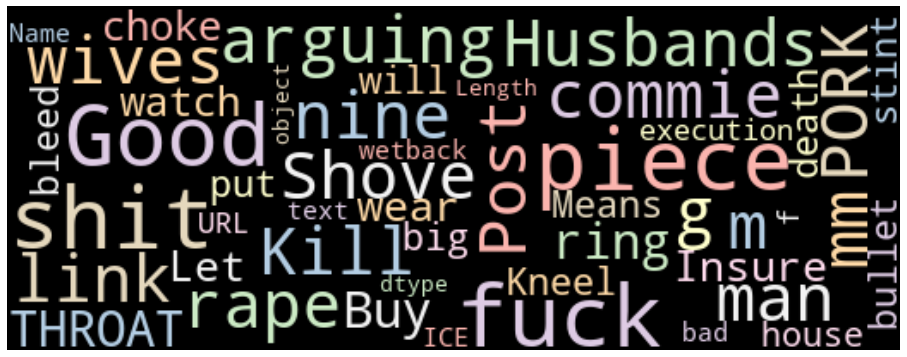

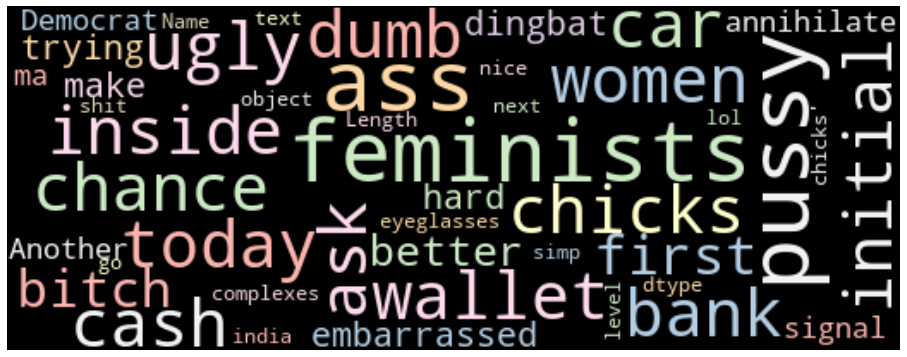

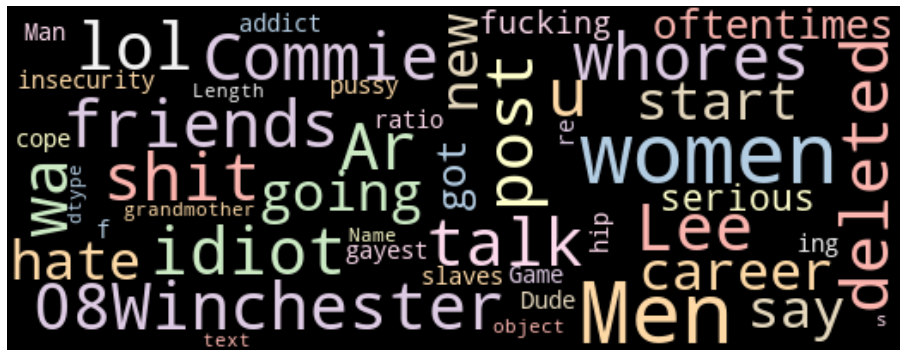

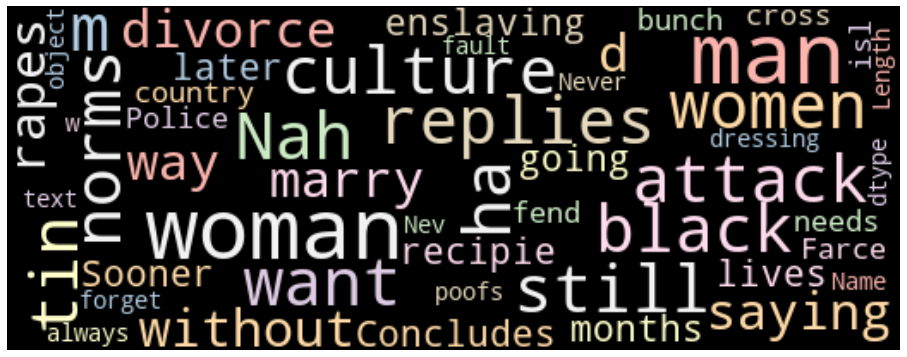

In [137]:
#word cloud for threats: haarm and incitement
threat_msg = df[df['label_category'] == 0]
threat_msg = str(threat_msg['text'])
threats_msg_cloud = WordCloud(width =520, height =200, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(threat_msg)
plt.figure(figsize=(16,10))
plt.imshow(threats_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

#word cloud for derogation
derogation_msg = df[df['label_category'] == 1]
derogation_msg = str(derogation_msg['text'])
derogation_msg_cloud = WordCloud(width =520, height =200, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(derogation_msg)
plt.figure(figsize=(16,10))
plt.imshow(derogation_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

#word cloud for animosity
animosity_msg = df[df['label_category'] == 2]
animosity_msg = str(animosity_msg['text'])
animosity_msg_cloud = WordCloud(width =520, height =200, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(animosity_msg)
plt.figure(figsize=(16,10))
plt.imshow(animosity_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

#word cloud for prejudiced discussions
prejudiced_msg = df[df['label_category'] == 3]
prejudiced_msg = str(prejudiced_msg['text'])
prejudiced_msg_cloud = WordCloud(width =520, height =200, stopwords = STOPWORDS, max_font_size = 50, background_color = "black", colormap = 'Pastel1').generate(prejudiced_msg)
plt.figure(figsize=(16,10))
plt.imshow(prejudiced_msg_cloud, interpolation = 'bilinear')
plt.axis('off') # turn off axis
plt.show()

# Visualising & Fixing Imbalanced Dataset

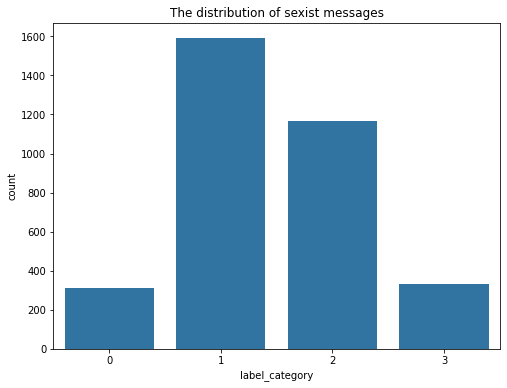

In [138]:

# print("Before SMOTE: ", np.unique(y, return_counts=True))

plt.figure(figsize=(8,6))
sns.countplot(x='label_category', data = df)
plt.title('The distribution of sexist messages')
plt.show()

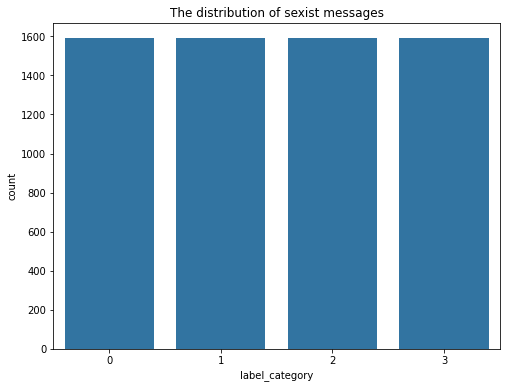

In [139]:
from imblearn.over_sampling import RandomOverSampler

# Assuming X and y are your feature matrix and target labels
# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=42)


# Fit and resample the data
X_resampled, y_resampled = ros.fit_resample(df.drop(columns=['label_category']), df['label_category'])

df = pd.concat([X_resampled, y_resampled.rename('label_category')], axis=1)
# print(df['text'])
# print(df.drop(columns=['label_category']))

plt.figure(figsize=(8,6))
sns.countplot(x='label_category', data = df)
plt.title('The distribution of sexist messages')
plt.show()

# Text Preprocessing

1. Train Test Split

In [140]:
#finding length of each text
df['text_length'] = df['text'].apply(len)

# train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['label_category'], test_size=0.2, random_state=434)


2. Tokenization of words

In [141]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# Defining pre-processing parameters
max_len = 40 
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>' # out of vocabulary token
vocab_size = 5000

# initiating tokenizer object 
tokenizer = Tokenizer(num_words = vocab_size, 
                      char_level = False,
                      oov_token = oov_tok)
tokenizer.fit_on_texts(x_train)

# Get the word_index
word_index = tokenizer.word_index
total_words = len(word_index)
total_words

8715

3. Padding and Sequencing

In [142]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Padding & sequencing for training data 
training_sequences = tokenizer.texts_to_sequences(x_train)
training_padded = pad_sequences(training_sequences,
                                maxlen = max_len,
                                padding = padding_type,
                                truncating = trunc_type)
print(training_padded.shape)
# Padding & sequencing for test data 
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,
                               maxlen = max_len,
                               padding = padding_type,
                               truncating = trunc_type)
print(testing_padded.shape)

(5088, 40)
(1272, 40)


4. Word Embedding Using one-hot encoding technique

In [143]:
# One hot encoding 
from tensorflow.keras.preprocessing.text import one_hot

encoded_train_docs = [one_hot(d, vocab_size) for d in x_train]
padded_train_docs = pad_sequences(encoded_train_docs, maxlen=max_len, padding='post')
print(padded_train_docs.shape)

encoded_test_docs = [one_hot(d, vocab_size) for d in x_test]
padded_test_docs = pad_sequences(encoded_test_docs, maxlen=max_len, padding='post')
print(padded_test_docs.shape)


(5088, 40)
(1272, 40)


# Building and training models

1. Building LSTM model

In [144]:
# Modeling
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,  Dense, Embedding, Dropout, GRU

In [145]:
# Define parameter
n_lstm = 128
drop_lstm = 0.3
embedding_dim = 16
num_of_epochs = 80
batch_size = 64


# Define LSTM Model 
model1 = Sequential()
model1.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model1.add(LSTM(n_lstm))
model1.add(Dropout(drop_lstm))
model1.add(Dense(4, activation='softmax'))
model1.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

model1.summary()

history = model1.fit(padded_train_docs,
                     y_train,
                     epochs=num_of_epochs, 
                     batch_size=batch_size,
                     validation_data=(padded_test_docs, y_test),
                     verbose=2)

model1.evaluate(padded_test_docs, y_test)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
80/80 - 6s - 75ms/step - accuracy: 0.3361 - loss: 1.3093 - val_accuracy: 0.5094 - val_loss: 1.1037
Epoch 2/80
80/80 - 4s - 53ms/step - accuracy: 0.5442 - loss: 0.9700 - val_accuracy: 0.5951 - val_loss: 0.8461
Epoch 3/80
80/80 - 4s - 45ms/step - accuracy: 0.6562 - loss: 0.7246 - val_accuracy: 0.6502 - val_loss: 0.7398
Epoch 4/80
80/80 - 3s - 43ms/step - accuracy: 0.7050 - loss: 0.5631 - val_accuracy: 0.6368 - val_loss: 0.7427
Epoch 5/80
80/80 - 3s - 39ms/step - accuracy: 0.7374 - loss: 0.5148 - val_accuracy: 0.6918 - val_loss: 0.8084
Epoch 6/80
80/80 - 3s - 40ms/step - accuracy: 0.7500 - loss: 0.4720 - val_accuracy: 0.7036 - val_loss: 0.7091
Epoch 7/80
80/80 - 3s - 40ms/step - accuracy: 0.7834 - loss: 0.4308 - val_accuracy: 0.7013 - val_loss: 0.7696
Epoch 8/80
80/80 - 3s - 41ms/step - accuracy: 0.8101 - loss: 0.4151 - val_accuracy: 0.7020 - val_loss: 0.8012
Epoch 9/80
80/80 - 3s - 40ms/step - accuracy: 0.8133 - loss: 0.4286 - val_accuracy: 0.6824 - val_loss: 0.8333
Epoch 10/8

[1.4279688596725464, 0.7830188870429993]

2. Building GRU model

In [146]:
# Define parameter
n_gru = 128
drop_gru = 0.3

# Define GRU Model 
model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim, input_length=max_len))
model2.add(GRU(n_gru))
model2.add(Dropout(drop_gru))
model2.add(Dense(4, activation='softmax'))
model2.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

model2.summary()

history = model2.fit(padded_train_docs,
                     y_train,
                     epochs=num_of_epochs, 
                     batch_size=batch_size,
                     validation_data=(padded_test_docs, y_test),
                     verbose=2)

model2.evaluate(padded_test_docs, y_test)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_35 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_6 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/80
80/80 - 4s - 54ms/step - accuracy: 0.2657 - loss: 1.3829 - val_accuracy: 0.2822 - val_loss: 1.3744
Epoch 2/80
80/80 - 3s - 40ms/step - accuracy: 0.3781 - loss: 1.2664 - val_accuracy: 0.4670 - val_loss: 1.1124
Epoch 3/80
80/80 - 3s - 42ms/step - accuracy: 0.5507 - loss: 0.9525 - val_accuracy: 0.6289 - val_loss: 0.8300
Epoch 4/80
80/80 - 4s - 45ms/step - accuracy: 0.6610 - loss: 0.7171 - val_accuracy: 0.6730 - val_loss: 0.7341
Epoch 5/80
80/80 - 3s - 40ms/step - accuracy: 0.7142 - loss: 0.5743 - val_accuracy: 0.6918 - val_loss: 0.7257
Epoch 6/80
80/80 - 3s - 40ms/step - accuracy: 0.7626 - loss: 0.4803 - val_accuracy: 0.7020 - val_loss: 0.7074
Epoch 7/80
80/80 - 3s - 41ms/step - accuracy: 0.7934 - loss: 0.4436 - val_accuracy: 0.7201 - val_loss: 0.7282
Epoch 8/80
80/80 - 3s - 41ms/step - accuracy: 0.8143 - loss: 0.3908 - val_accuracy: 0.7099 - val_loss: 0.8428
Epoch 9/80
80/80 - 3s - 41ms/step - accuracy: 0.8555 - loss: 0.3376 - val_accuracy: 0.7209 - val_loss: 0.9221
Epoch 10/8

[1.8941166400909424, 0.7767295837402344]

# Performance metrics

1. LSTM performance

In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
y_test_categorical = to_categorical(y_test, num_classes=4)

y_pred = model1.predict(padded_test_docs)
# Find the index of the maximum value across the columns
max_indices = np.argmax(y_pred, axis=1)

# Reshape the resulting array to have a single column
max_indices = max_indices.reshape(-1, 1)
# print(padded_test_docs)

# # Compute precision
precision = precision_score(y_test, max_indices, average='weighted')

# Compute recall
recall = recall_score(y_test, max_indices, average='weighted')

# Compute F1 score
f1 = f1_score(y_test, max_indices, average='weighted')

# # Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Precision: 0.7722148069283398
Recall: 0.7830188679245284
F1 Score: 0.7732211959521371


2. GRU performance

In [148]:
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.utils import to_categorical
y_test_categorical = to_categorical(y_test, num_classes=4)

y_pred = model2.predict(padded_test_docs)

# Find the index of the maximum value across the columns
max_indices = np.argmax(y_pred, axis=1)

# Reshape the resulting array to have a single column
max_indices = max_indices.reshape(-1, 1)

# # Compute precision
precision = precision_score(y_test, max_indices, average='weighted')

# Compute recall
recall = recall_score(y_test, max_indices, average='weighted')

# Compute F1 score
f1 = f1_score(y_test, max_indices, average='weighted')

# # Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Precision: 0.7632907553523479
Recall: 0.7767295597484277
F1 Score: 0.7682648045976296
